<a href="https://colab.research.google.com/github/ZacharySoo01/I320D_AppliedML_Project/blob/main/Microbusiness_Density_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Preprocessing (Zach)
In this section, we performed Data Preprocessing techniques on the given datasets.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

# Read the train, test, and starter datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("revealed_test.csv")
census_starter_df = pd.read_csv("census_starter.csv")

# Print all datasets
train_df
test_df
census_starter_df

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [2]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [3]:
test_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [4]:
census_starter_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


Here, I combined the census starter data columns to the test and training datasets, since there were missing features and labels from both datasets.

In [5]:
# Merge the census starter data on the cfips column
train_df = pd.merge(train_df, census_starter_df, on=["cfips"])
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


In [6]:
# Merge the census starter data on the cfips column
test_df = pd.merge(test_df, census_starter_df, on=["cfips"])
test_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133,74.5,78.1,81.8,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247,57.2,60.4,60.5,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,56041_2022-12-01,56041,Uinta County,Wyoming,2022-12-01,4.050703,588,83.8,88.2,89.5,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
6266,56043_2022-11-01,56043,Washakie County,Wyoming,2022-11-01,3.143093,190,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6267,56043_2022-12-01,56043,Washakie County,Wyoming,2022-12-01,3.060380,185,76.4,78.3,78.2,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
6268,56045_2022-11-01,56045,Weston County,Wyoming,2022-11-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


I then dropped duplicates and null values from the datasets.

In [7]:
# Drop duplicates and null values for both datasets
train_df = train_df.drop_duplicates()
train_df = train_df.dropna()
test_df = test_df.drop_duplicates()
test_df = test_df.dropna()

After that I printed the info of the datasets.

In [8]:
# Print info to verify results
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122148 entries, 0 to 122264
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122148 non-null  object 
 1   cfips                  122148 non-null  int64  
 2   county                 122148 non-null  object 
 3   state                  122148 non-null  object 
 4   first_day_of_month     122148 non-null  object 
 5   microbusiness_density  122148 non-null  float64
 6   active                 122148 non-null  int64  
 7   pct_bb_2017            122148 non-null  float64
 8   pct_bb_2018            122148 non-null  float64
 9   pct_bb_2019            122148 non-null  float64
 10  pct_bb_2020            122148 non-null  float64
 11  pct_bb_2021            122148 non-null  float64
 12  pct_college_2017       122148 non-null  float64
 13  pct_college_2018       122148 non-null  float64
 14  pct_college_2019       122148 non-null  f

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6264 entries, 0 to 6269
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   row_id                 6264 non-null   object 
 1   cfips                  6264 non-null   int64  
 2   county                 6264 non-null   object 
 3   state                  6264 non-null   object 
 4   first_day_of_month     6264 non-null   object 
 5   microbusiness_density  6264 non-null   float64
 6   active                 6264 non-null   int64  
 7   pct_bb_2017            6264 non-null   float64
 8   pct_bb_2018            6264 non-null   float64
 9   pct_bb_2019            6264 non-null   float64
 10  pct_bb_2020            6264 non-null   float64
 11  pct_bb_2021            6264 non-null   float64
 12  pct_college_2017       6264 non-null   float64
 13  pct_college_2018       6264 non-null   float64
 14  pct_college_2019       6264 non-null   float64
 15  pct_colle

# Exporatory Data Analysis (EDA) (Bryce and Zach)
In this section, we conducted Exporatory Data Analysis to explore patterns within the dataset.

Here, I plotted the mean microbusiness density curve over time for all US cities.

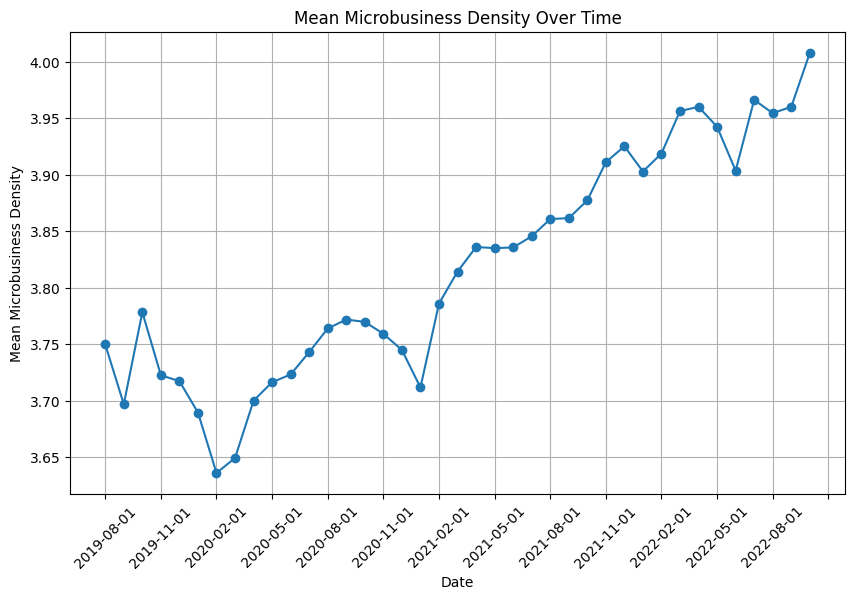

In [10]:
import matplotlib.pyplot as plt

# Mean Microbusiness Density of all counties
plt.figure(figsize=(10, 6))
mean_density = train_df.groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plt.plot(mean_density['first_day_of_month'], mean_density['microbusiness_density'], marker='o')
plt.title('Mean Microbusiness Density Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Microbusiness Density')

# Set tick locator to a specified interval
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))  # Set tick locator to every 3 months

plt.grid(True)
plt.show();


Observations
- Mean microbusiness density slowly increased from 2019 to 2022.

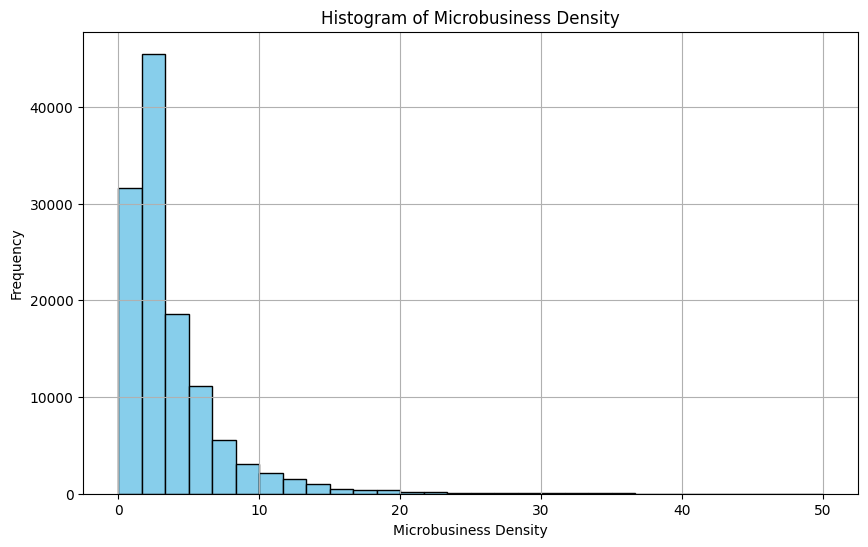

In [11]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df['microbusiness_density'], bins=30, range=(0, 50), color='skyblue', edgecolor='black')
plt.title('Histogram of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show();


Most Microbusiness density levels are under 50 and majority of them fall under 10. Which means less than 10 microbusiness per every 100 people is most common.

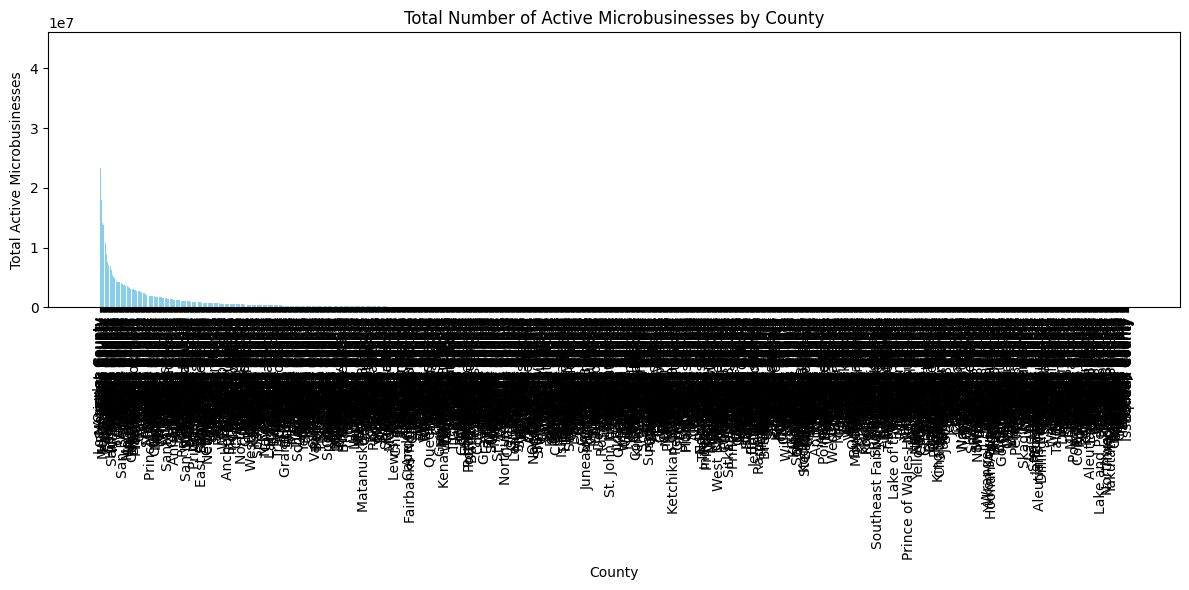

In [12]:
import matplotlib.pyplot as plt

# Group by county and calculate the total number of active microbusinesses
county_active_counts = train_df.groupby('county')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
county_active_counts = county_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(county_active_counts['county'], county_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by County')
plt.xlabel('County')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();


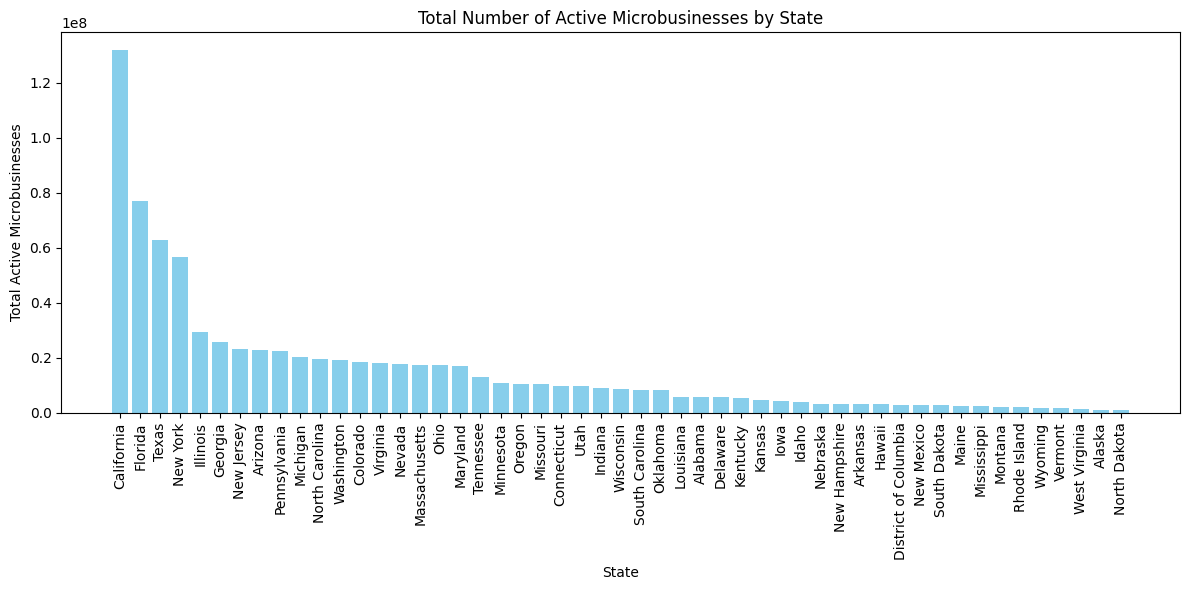

Top 5 States with the Highest Active Microbusinesses:
         state     active
4   California  131742878
9      Florida   77140048
43       Texas   62716042
32    New York   56486106
13    Illinois   29174283


In [13]:
# Group by state and calculate the total number of active microbusinesses
state_active_counts = train_df.groupby('state')['active'].sum().reset_index()

# Sort the data by the total number of active microbusinesses
state_active_counts = state_active_counts.sort_values(by='active', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_active_counts['state'], state_active_counts['active'], color='skyblue')
plt.title('Total Number of Active Microbusinesses by State')
plt.xlabel('State')
plt.ylabel('Total Active Microbusinesses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display the top 5 states with the highest number of active microbusinesses
top_states = state_active_counts.head(5)
print("Top 5 States with the Highest Active Microbusinesses:")
print(top_states);


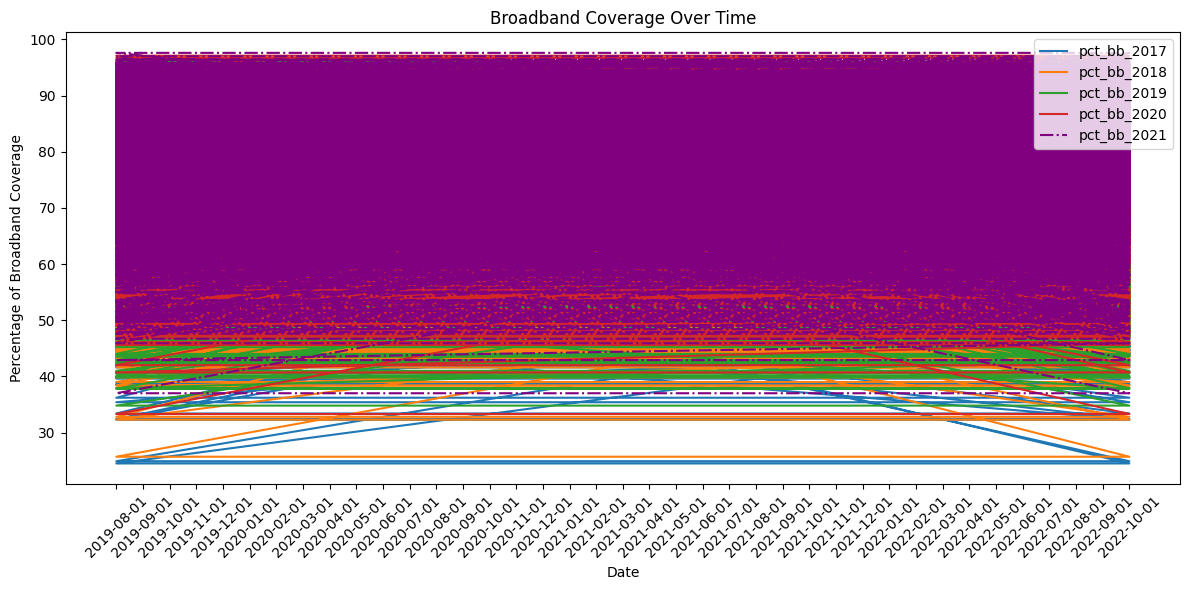

In [14]:
import matplotlib.pyplot as plt

# Extract the relevant columns
bb_coverage_columns = ['first_day_of_month', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']
bb_coverage_df = train_df[bb_coverage_columns]

# Set 'first_day_of_month' as the index
bb_coverage_df.set_index('first_day_of_month', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
for column in bb_coverage_df.columns:
    if column == 'pct_bb_2021':  # Adjust the color and line style for the purple line
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column, color='purple', linestyle='-.')
    else:
        plt.plot(bb_coverage_df.index, bb_coverage_df[column], label=column)

plt.title('Broadband Coverage Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Broadband Coverage')
plt.legend(loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

# Feature Engineering (Sean)
- In this section, I performed One-Hot Encoding on the Categorical Features(coutny & state) and Standard Scaling on the numerical features.
- Then, I split the transformed dataframes into the features and label datasets.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = StandardScaler()
train_df_transformed = train_df
test_df_transformed = test_df

In [16]:
# convert all categorical-nominal features from a 1-dimensional list into a list of lists
county_to_list = train_df_transformed["county"].to_list()
state_to_list = train_df_transformed["state"].to_list()

county_to_list_of_lists = [[county] for county in county_to_list]
state_to_list_of_lists = [[state] for state in state_to_list]

# define the OneHotEncoder objects for each feature
county_encoder = OneHotEncoder()
state_encoder = OneHotEncoder()

# Fit our data (i.e. extract and order vocab)
county_encoder.fit(county_to_list_of_lists)
state_encoder.fit(state_to_list_of_lists)

# Transformed each example in our data into 1-hot-encoder form
county_transformed = county_encoder.fit_transform(county_to_list_of_lists)
state_transformed = state_encoder.fit_transform(state_to_list_of_lists)

# Transform the result object into a matrix
county_transformed = county_transformed.toarray()
state_transformed = state_transformed.toarray()

# convert the matrices into a dataframe
county_transformed_df = pd.DataFrame(county_transformed)
state_transformed_df = pd.DataFrame(state_transformed)

county_transformed_df.columns = county_encoder.categories_[0]
state_transformed_df.columns = state_encoder.categories_[0]

# concatenate all three features back to the original dataframe
train_df_transformed.reset_index(drop=True, inplace=True)
county_transformed_df.reset_index(drop=True, inplace=True)
state_transformed_df.reset_index(drop=True, inplace=True)

# transform this date value
train_df_transformed['first_day_of_month'] = pd.to_datetime(train_df_transformed['first_day_of_month'])
train_df_transformed['first_day_of_month'] = train_df_transformed['first_day_of_month'].apply(lambda x: x.timestamp())

train_df_transformed = pd.concat([train_df_transformed,county_transformed_df,state_transformed_df], axis=1)

print(f"Shape of data after concatenating all 1-hot encodings = {train_df_transformed.shape}")

# drop all original features columns which we transformed
train_df_transformed = train_df_transformed.drop(columns=['county','state'], axis=1)

# print num of columns and rows
print(f"Shape of data after droping original categorical columns = {train_df_transformed.shape}")

train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler.fit_transform(train_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])

OneHotEncoder()

OneHotEncoder()

Shape of data after concatenating all 1-hot encodings = (122148, 1952)
Shape of data after droping original categorical columns = (122148, 1950)


In [17]:
# convert all categorical-nominal features from a 1-dimensional list into a list of lists
county_to_list = test_df_transformed["county"].to_list()
state_to_list = test_df_transformed["state"].to_list()

county_to_list_of_lists = [[county] for county in county_to_list]
state_to_list_of_lists = [[state] for state in state_to_list]

# define the OneHotEncoder objects for each feature
county_encoder = OneHotEncoder()
state_encoder = OneHotEncoder()

# Fit our data (i.e. extract and order vocab)
county_encoder.fit(county_to_list_of_lists)
state_encoder.fit(state_to_list_of_lists)

# Transformed each example in our data into 1-hot-encoder form
county_transformed = county_encoder.fit_transform(county_to_list_of_lists)
state_transformed = state_encoder.fit_transform(state_to_list_of_lists)

# Transform the result object into a matrix
county_transformed = county_transformed.toarray()
state_transformed = state_transformed.toarray()

# convert the matrices into a dataframe
county_transformed_df = pd.DataFrame(county_transformed)
state_transformed_df = pd.DataFrame(state_transformed)

county_transformed_df.columns = county_encoder.categories_[0]
state_transformed_df.columns = state_encoder.categories_[0]

# concatenate all three features back to the original dataframe
test_df_transformed.reset_index(drop=True, inplace=True)
county_transformed_df.reset_index(drop=True, inplace=True)
state_transformed_df.reset_index(drop=True, inplace=True)

# transform this date value
test_df_transformed['first_day_of_month'] = pd.to_datetime(test_df_transformed['first_day_of_month'])
test_df_transformed['first_day_of_month'] = test_df_transformed['first_day_of_month'].apply(lambda x: x.timestamp())

test_df_transformed = pd.concat([test_df_transformed,county_transformed_df,state_transformed_df], axis=1)

print(f"Shape of data after concatenating all 1-hot encodings = {test_df_transformed.shape}")

# drop all original features columns which we transformed
test_df_transformed = test_df_transformed.drop(columns=['county','state'], axis=1)

# print num of columns and rows
print(f"Shape of data after droping original categorical columns = {test_df_transformed.shape}")

test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']] = scaler.fit_transform(test_df_transformed[['active', 'pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021', 'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021', 'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021', 'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])

OneHotEncoder()

OneHotEncoder()

Shape of data after concatenating all 1-hot encodings = (6264, 1952)
Shape of data after droping original categorical columns = (6264, 1950)


In [18]:
train_df_features = train_df_transformed.drop(['microbusiness_density'], axis=1)
train_df_label = train_df_transformed[['microbusiness_density']]
test_df_features = test_df_transformed.drop(['microbusiness_density'], axis=1)
test_df_label = test_df_transformed[['microbusiness_density']]

In [19]:
train_df_features.head(5)
train_df_label.head(5)
test_df_features.head(5)
test_df_label.head(5)

,row_id,cfips,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001_2019-08-01,1001,1.564618e+09,-0.157305,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001_2019-09-01,1001,1.567296e+09,-0.158848,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001_2019-10-01,1001,1.569888e+09,-0.156700,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001_2019-11-01,1001,1.572566e+09,-0.157487,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001_2019-12-01,1001,1.575158e+09,-0.157487,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,microbusiness_density
0,3.007682
1,2.884870
2,3.055843
3,2.993233
4,2.993233


,row_id,cfips,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001_2022-11-01,1001,1.667261e+09,-0.154913,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001_2022-12-01,1001,1.669853e+09,-0.154567,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003_2022-11-01,1003,1.667261e+09,0.211517,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003_2022-12-01,1003,1.669853e+09,0.211170,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005_2022-11-01,1005,1.667261e+09,-0.190048,-1.315677,-1.332183,-1.690990,-1.697513,-2.026517,-1.114344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,microbusiness_density
0,3.442677
1,3.470915
2,8.257636
3,8.250630
4,1.247223


Removing column identifiers

In [20]:
train_df_features = train_df_features.drop(['row_id', 'cfips', 'District of Columbia'], axis=1)
test_df_features = test_df_features.drop(['row_id', 'cfips', 'District of Columbia'], axis=1)
train_df_features.head()
test_df_features.head()

,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1.564618e+09,-0.157305,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.567296e+09,-0.158848,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.569888e+09,-0.156700,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.572566e+09,-0.157487,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.575158e+09,-0.157487,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,first_day_of_month,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1.667261e+09,-0.154913,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.669853e+09,-0.154567,0.686486,0.668946,0.586036,0.502719,0.628377,0.121847,0.335034,0.324747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.667261e+09,0.211517,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,1.188260,1.186671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.669853e+09,0.211170,0.469757,0.582411,0.721978,0.794462,0.933245,1.178879,1.188260,1.186671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.667261e+09,-0.190048,-1.315677,-1.332183,-1.690990,-1.697513,-2.026517,-1.114344,-1.104786,-1.170429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save the data files to csv

In [21]:
train_df_features.to_csv("X_train.csv")
train_df_label.to_csv("y_train.csv")
test_df_features.to_csv("X_test.csv")
test_df_label.to_csv("y_test.csv")

# Testing different models (Zach and Sean)

Testing xgboost

In [22]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_df_features, label=train_df_label)
dtest = xgb.DMatrix(test_df_features, label=test_df_label)
params = {
    'objective': 'reg:squarederror',  # Using squared error for regression
    'max_depth': 3,                    # Maximum depth of each tree
    'eta': 0.1,                        # Learning rate
    'gamma': 0.1,                      # Minimum loss reduction required to make a further partition
    'subsample': 0.8,                  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,           # Subsample ratio of columns when constructing each tree
    'eval_metric': 'rmse'              # Evaluation metric to use
}

# Training the XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Making predictions on the test set
y_pred = bst.predict(dtest)

In [23]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# Function to evaluate between actual and predicted labels
def evaluate(y_true, y_pred):
    mean_squared_error=metrics.mean_squared_error(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    correlation = pearsonr(y_true.to_numpy().flatten(), y_pred.flatten())
    r2 = metrics.r2_score(test_df_label, y_pred)

    print ("R-squared Score:", r2)
    print (f"Mean Squared Error on test data {mean_squared_error}")
    print (f"Mean Absolute Error on test data {mean_absolute_error}")
    print (f"Pearson correlation coefficient between actual and predicted values is {correlation}")

# Conduct evaluation for xgboost
evaluate(test_df_label, y_pred)

R-squared Score: 0.7583434424487983
Mean Squared Error on test data 9.41459973585701
Mean Absolute Error on test data 1.1068037323995557
Pearson correlation coefficient between actual and predicted values is PearsonRResult(statistic=0.911135709737574, pvalue=0.0)


In [24]:
results_df = pd.DataFrame({'Actual': test_df_label['microbusiness_density'], 'Predicted': y_pred})
results_df.head()

,Actual,Predicted
0,3.442677,3.852134
1,3.470915,3.852134
2,8.257636,7.258350
3,8.250630,7.258350
4,1.247223,1.589226


The fit of the model is okay, but can be improved (R^2 score of 1 indicates a
perfect fit, score of 0 indicates no fit)

Testing Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_df_features, train_df_label['microbusiness_density'].tolist())
y_pred = model.predict(test_df_features)

evaluate(test_df_label, y_pred)

RandomForestRegressor(random_state=42)

R-squared Score: 0.9726787005216476
Mean Squared Error on test data 1.0643994165052502
Mean Absolute Error on test data 0.4388407488826803
Pearson correlation coefficient between actual and predicted values is PearsonRResult(statistic=0.9908326089076158, pvalue=0.0)


In [26]:
results_df = pd.DataFrame({'Actual': test_df_label['microbusiness_density'], 'Predicted': y_pred})
results_df.head()

,Actual,Predicted
0,3.442677,3.289944
1,3.470915,3.302223
2,8.257636,8.074923
3,8.250630,8.074362
4,1.247223,1.226189


The fit of the model is much better here with the Random Forest model, with a score of 0.97 (R^2 score of 1 indicates a
perfect fit, score of 0 indicates no fit)

Load the best model using pickle

In [27]:
import pickle

# Load the pickle file containing model
with open('best_model.model', 'wb') as f:
    pickle.dump(model, f)

# Feature Selection

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find correlation between each feature
#cor = train_df_features.corr()

In [29]:
# Save to CSV to avoid running cell again
# cor.to_csv('correlation_matrix.csv', index=False)

In [30]:
# Assuming cor is your correlation matrix DataFrame
# Filter out the correlation matrix to exclude 1.0 correlation values
"""
filtered_cor = cor[(cor < 0.75) & (cor > -.5)]

# Stack the filtered correlation matrix to create a Series of correlation values
filtered_cor_series = filtered_cor.stack()

# Sort the Series by correlation values in descending order
sorted_filtered_cor = filtered_cor_series.sort_values(ascending=False)

# Display the pairs of features with the highest correlation values (excluding perfect correlation)
top_filtered_correlation_pairs = sorted_filtered_cor.head(10)  # Change the number to show more or fewer pairs
print(top_filtered_correlation_pairs)
"""

'\nfiltered_cor = cor[(cor < 0.75) & (cor > -.5)]\n\n# Stack the filtered correlation matrix to create a Series of correlation values\nfiltered_cor_series = filtered_cor.stack()\n\n# Sort the Series by correlation values in descending order\nsorted_filtered_cor = filtered_cor_series.sort_values(ascending=False)\n\n# Display the pairs of features with the highest correlation values (excluding perfect correlation)\ntop_filtered_correlation_pairs = sorted_filtered_cor.head(10)  # Change the number to show more or fewer pairs\nprint(top_filtered_correlation_pairs)\n'